# ECE 364 Lecture 10 Primal Optimization

## Lecture goals
Multivariable maxima and minima <br>
Gradient descent  <br>
Gradient descent with Pytorch <br>


## Multivariable maxima and minima <br>
* Multivarialbe function<br>
Example: a function  $f(x, y) = x^2 + y^2$<br>
* The function f(x, y) = x2 + y2 is a revolving parabola called a paraboloid.<br>
<div> <img src="attachment:parabola.png" width="250"/> </div><br>






## Multivariable maxima and minima <br>
* Multivarialbe function<br>
Example: a function  $f(x, y) = x^2 + y^2$<br>
* The function f(x, y) = x2 + y2 is a revolving parabola called a paraboloid.<br>
* A level curve is the graph of the equation $x^2 + y^2 = c$, which describes a circle with radius $\sqrt{C}$.
* Taking different values of c we obtain:

<div> 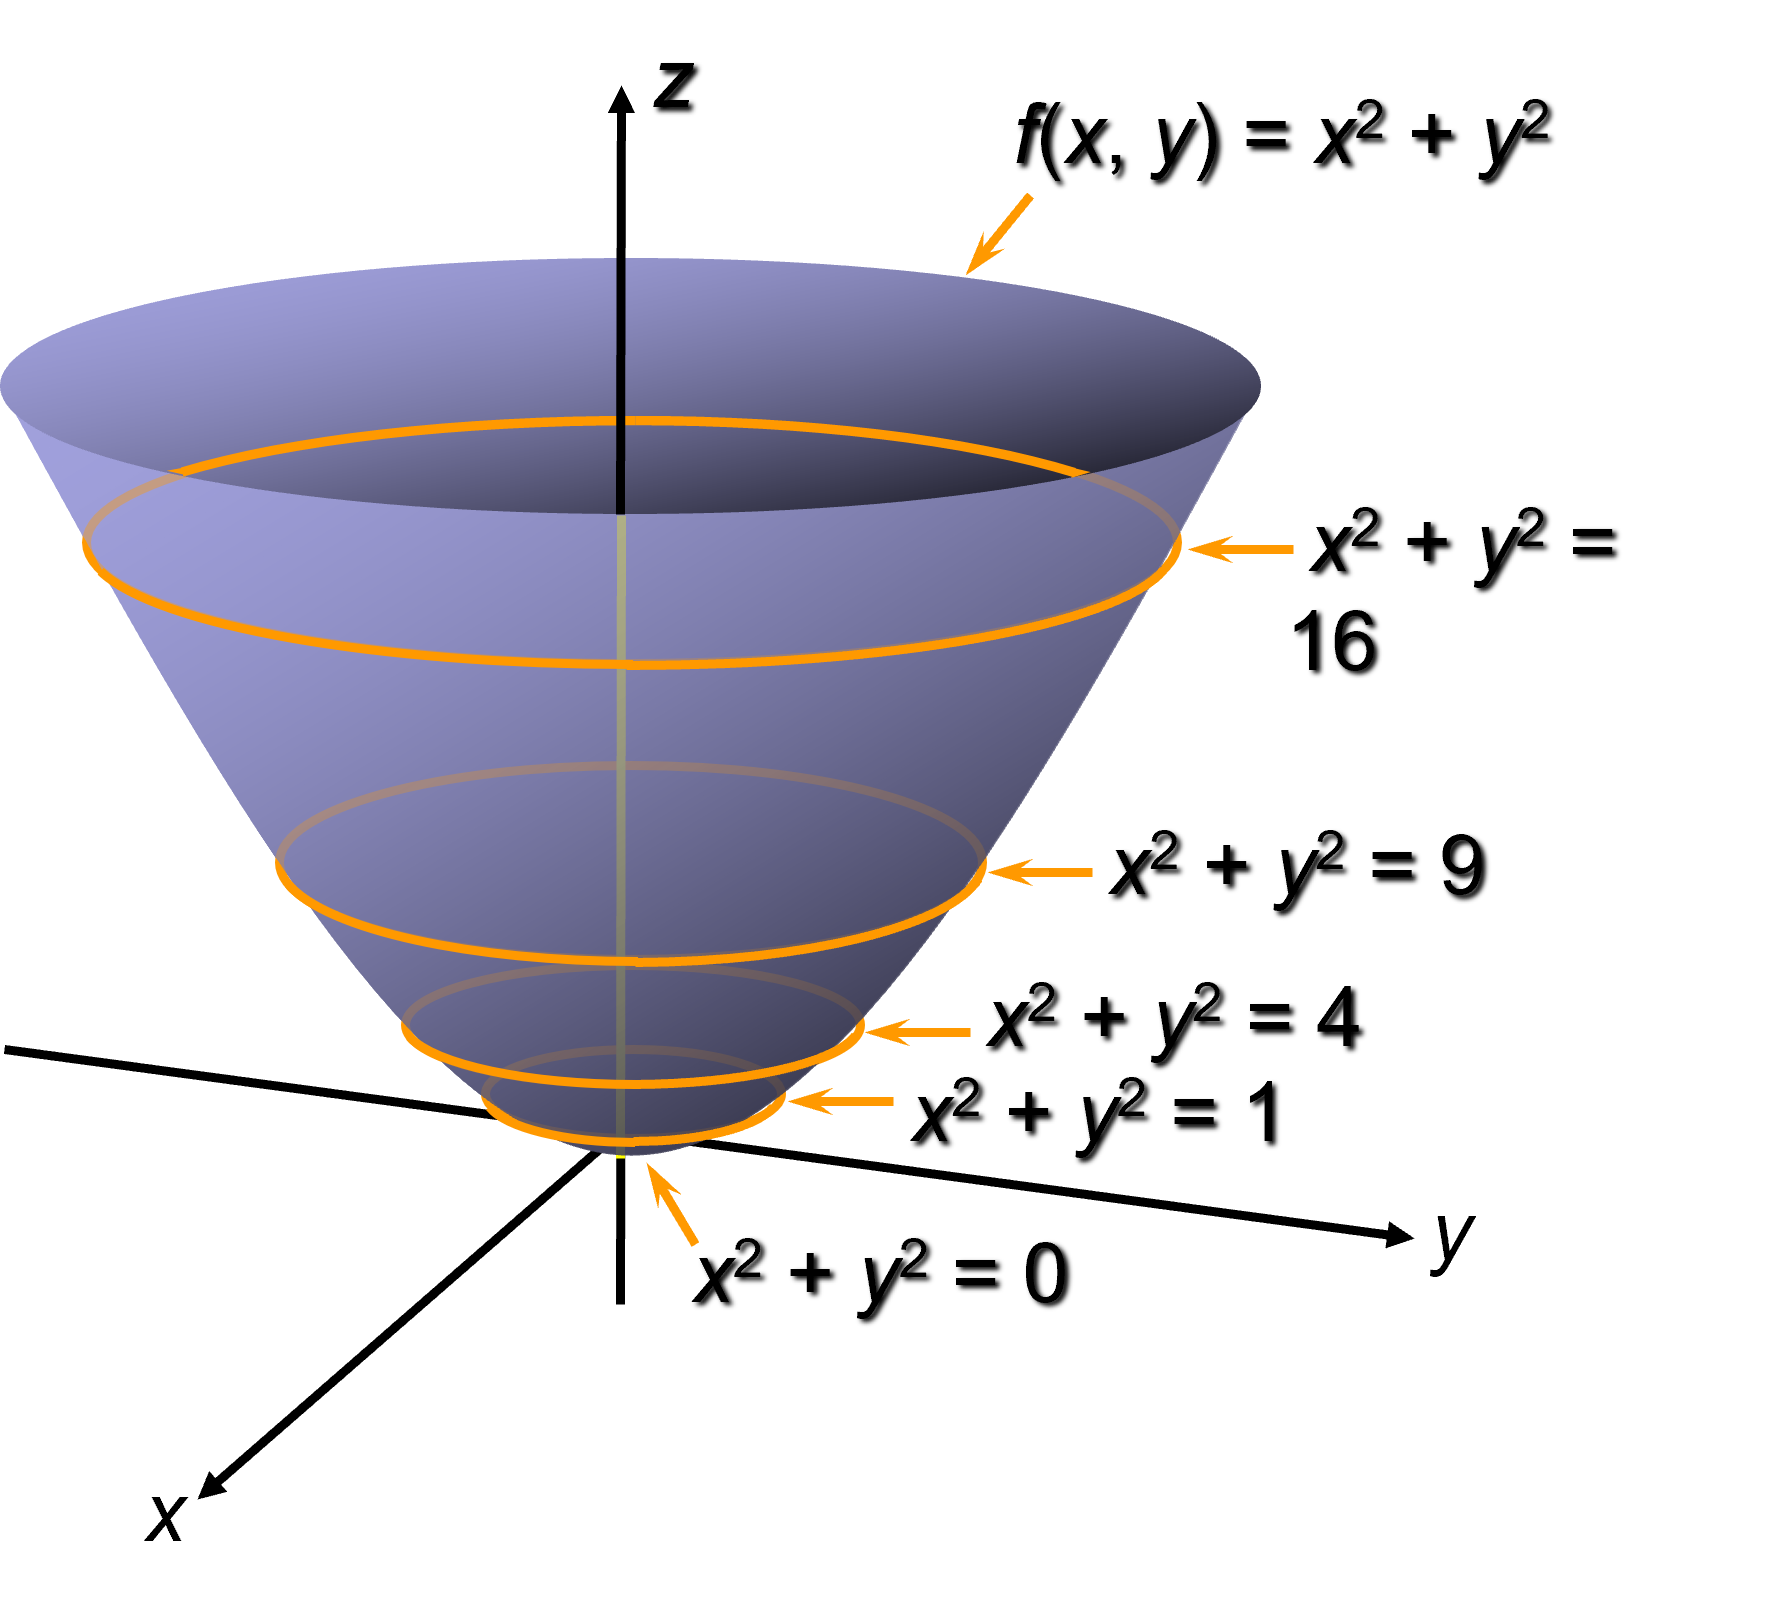 </div><br>


## Multivariable maxima and minima

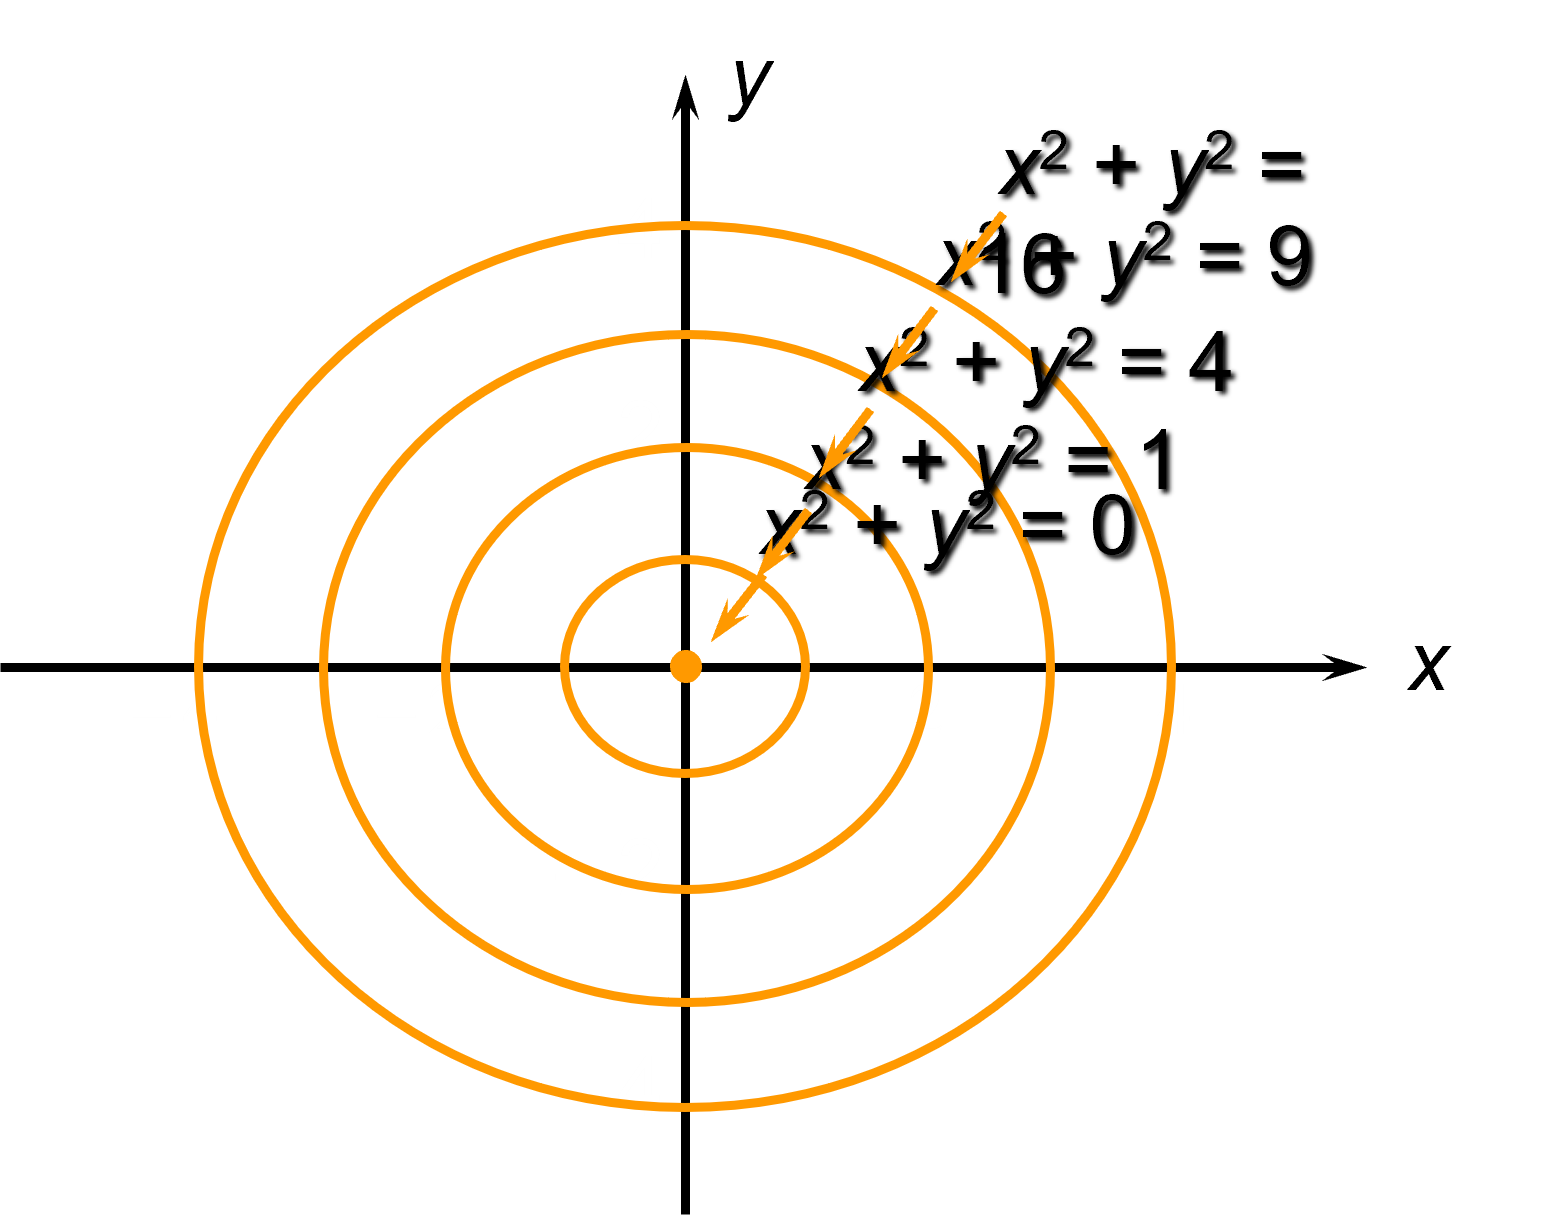 </div>
* Let f be a function defined on a region R containing the point (a, b).
Then, f has a relative maximum at (a, b)                      
if f(x, y) $\leq$ f(a, b) for all points (x, y) that are sufficiently close to (a, b).
The number f(a, b) is called a **relative maximum value**.
Similarly, f has a relative minimum at (a, b)               
if f(x, y) $\geq$ f(a, b) for all points (x, y) that are sufficiently close to (a, b).
The number f(a, b) is called a **relative minimum value**.


## Multivariable maxima and minima

At a minimum point of the graph of a function of two variables, such as point (a, b) below, the plane tangent to the graph of the function is horizontal (assuming the surface of   the graph is smooth):

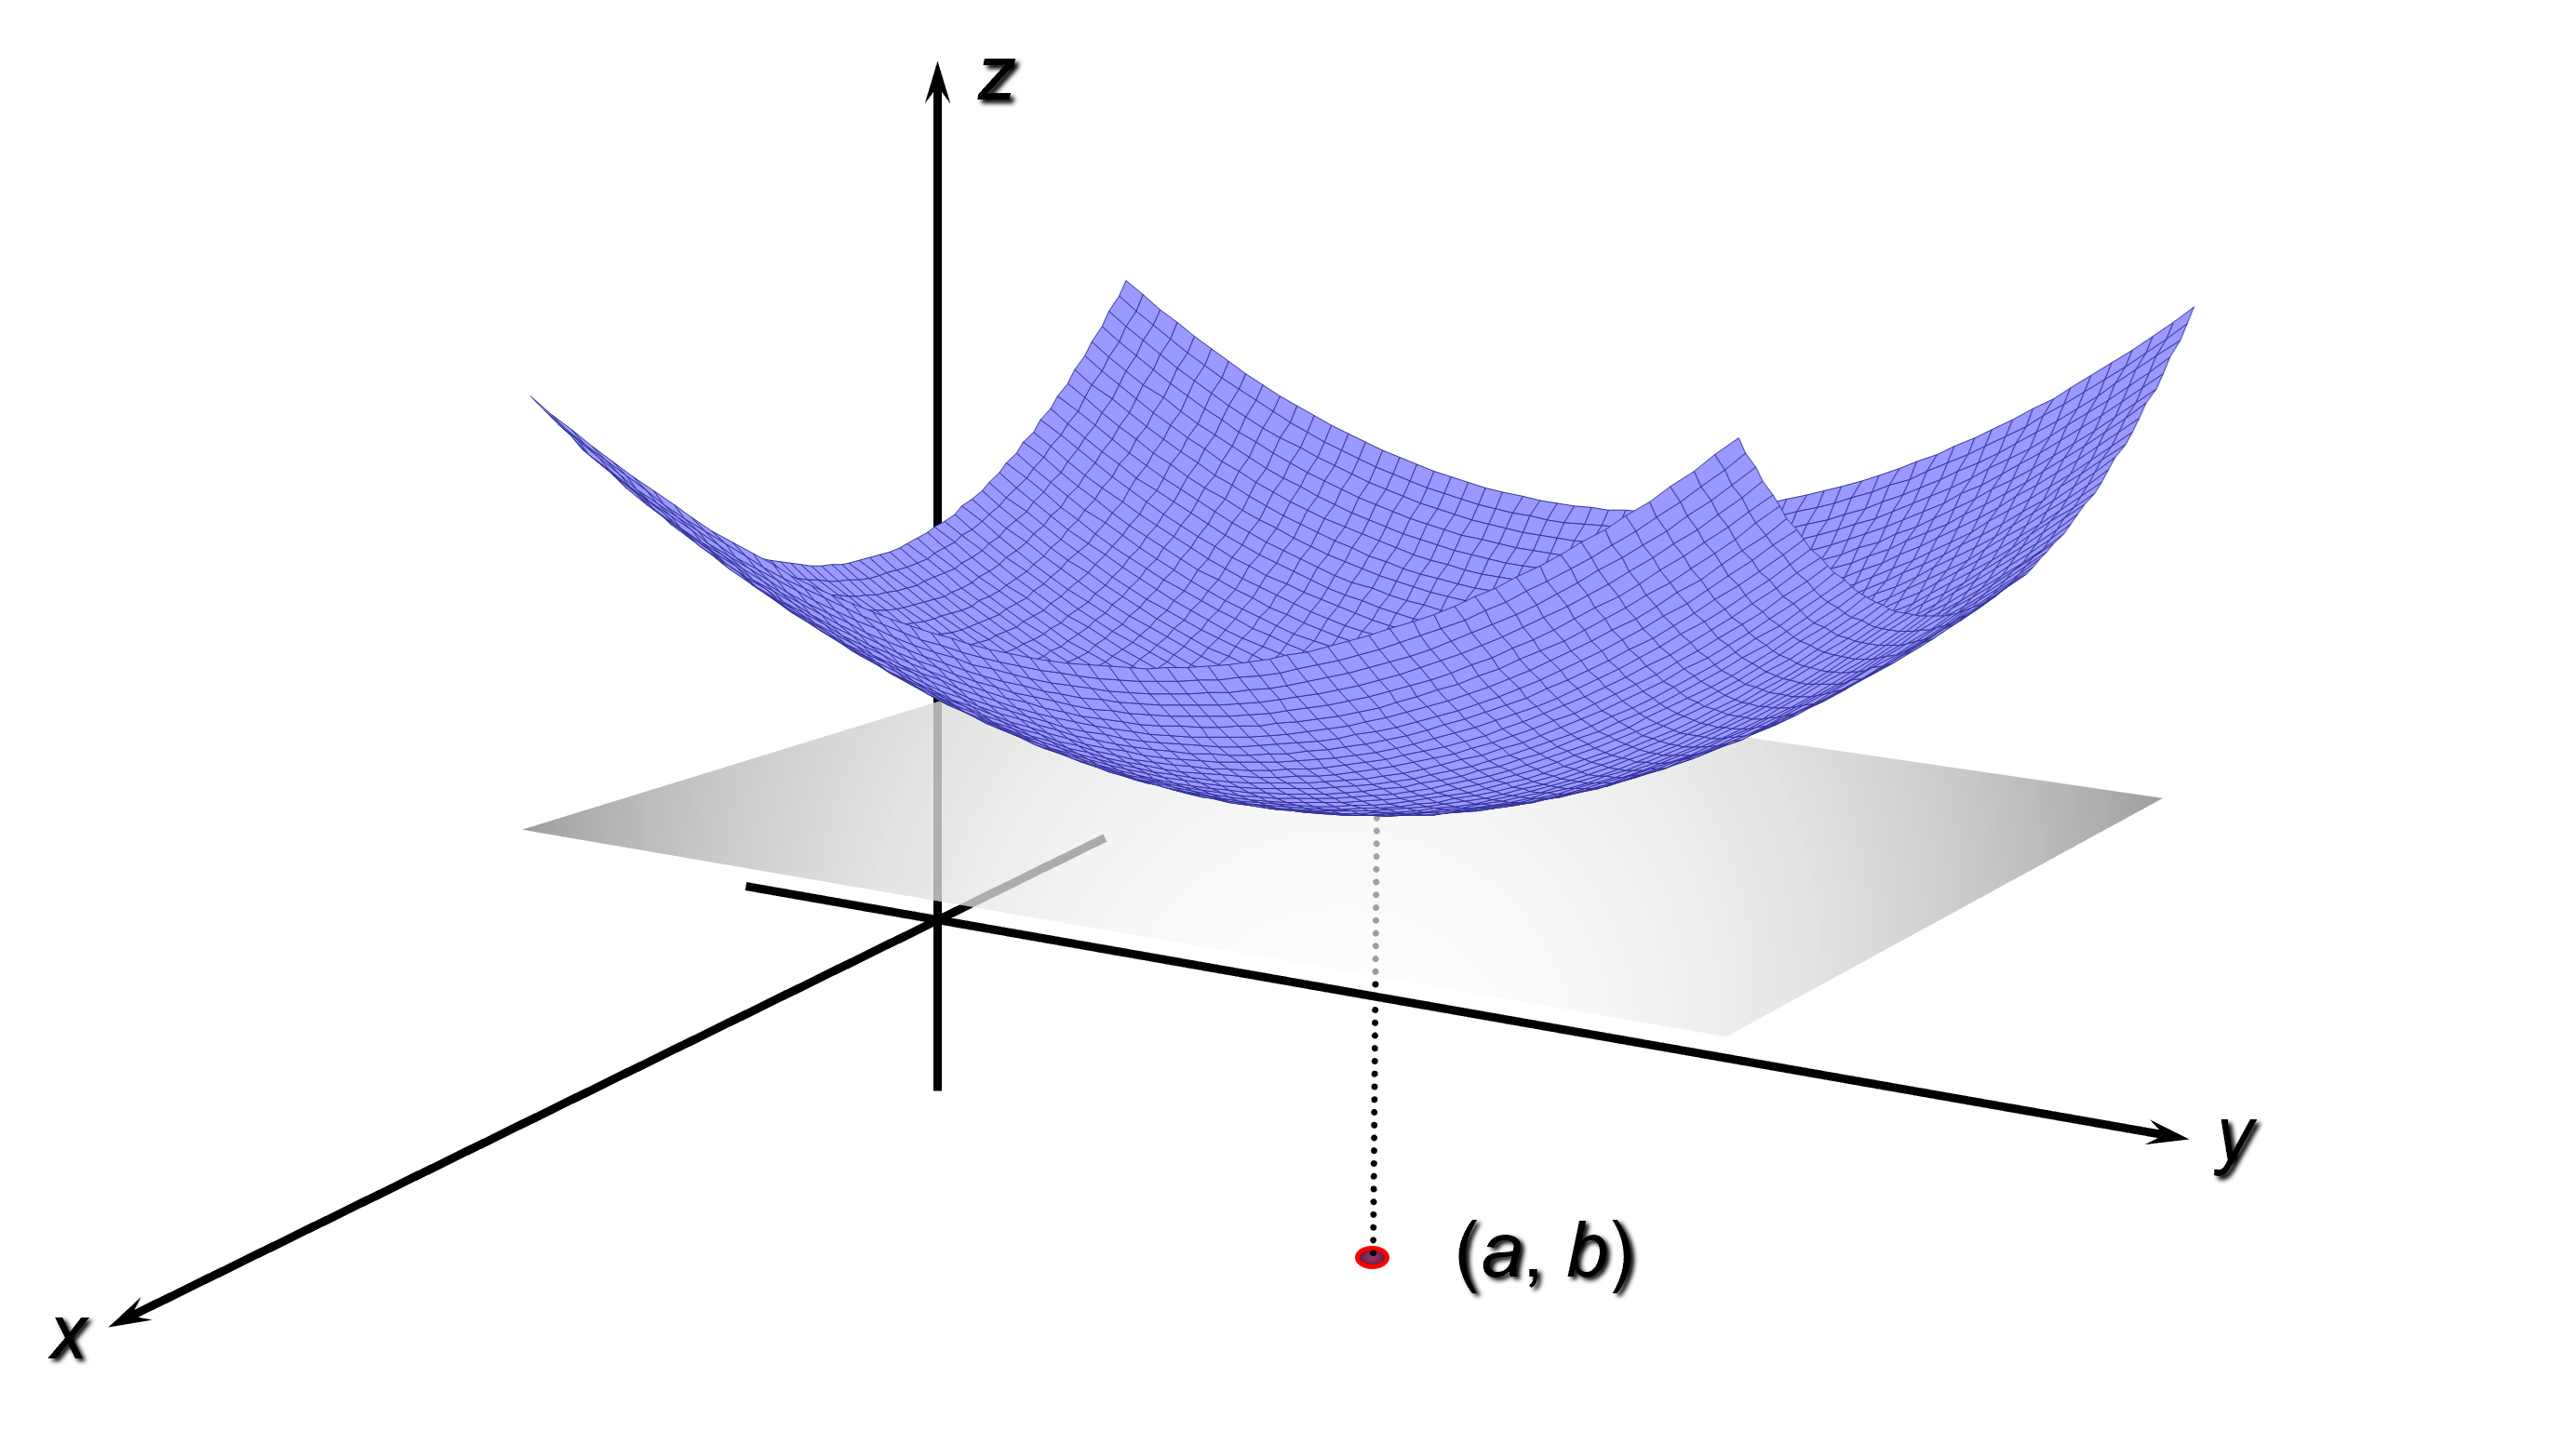 </div>



## Multivariable maxima and minima  
* At a minimum point, the graph of the function has a slope of zero along a direction parallel to the x-axis:

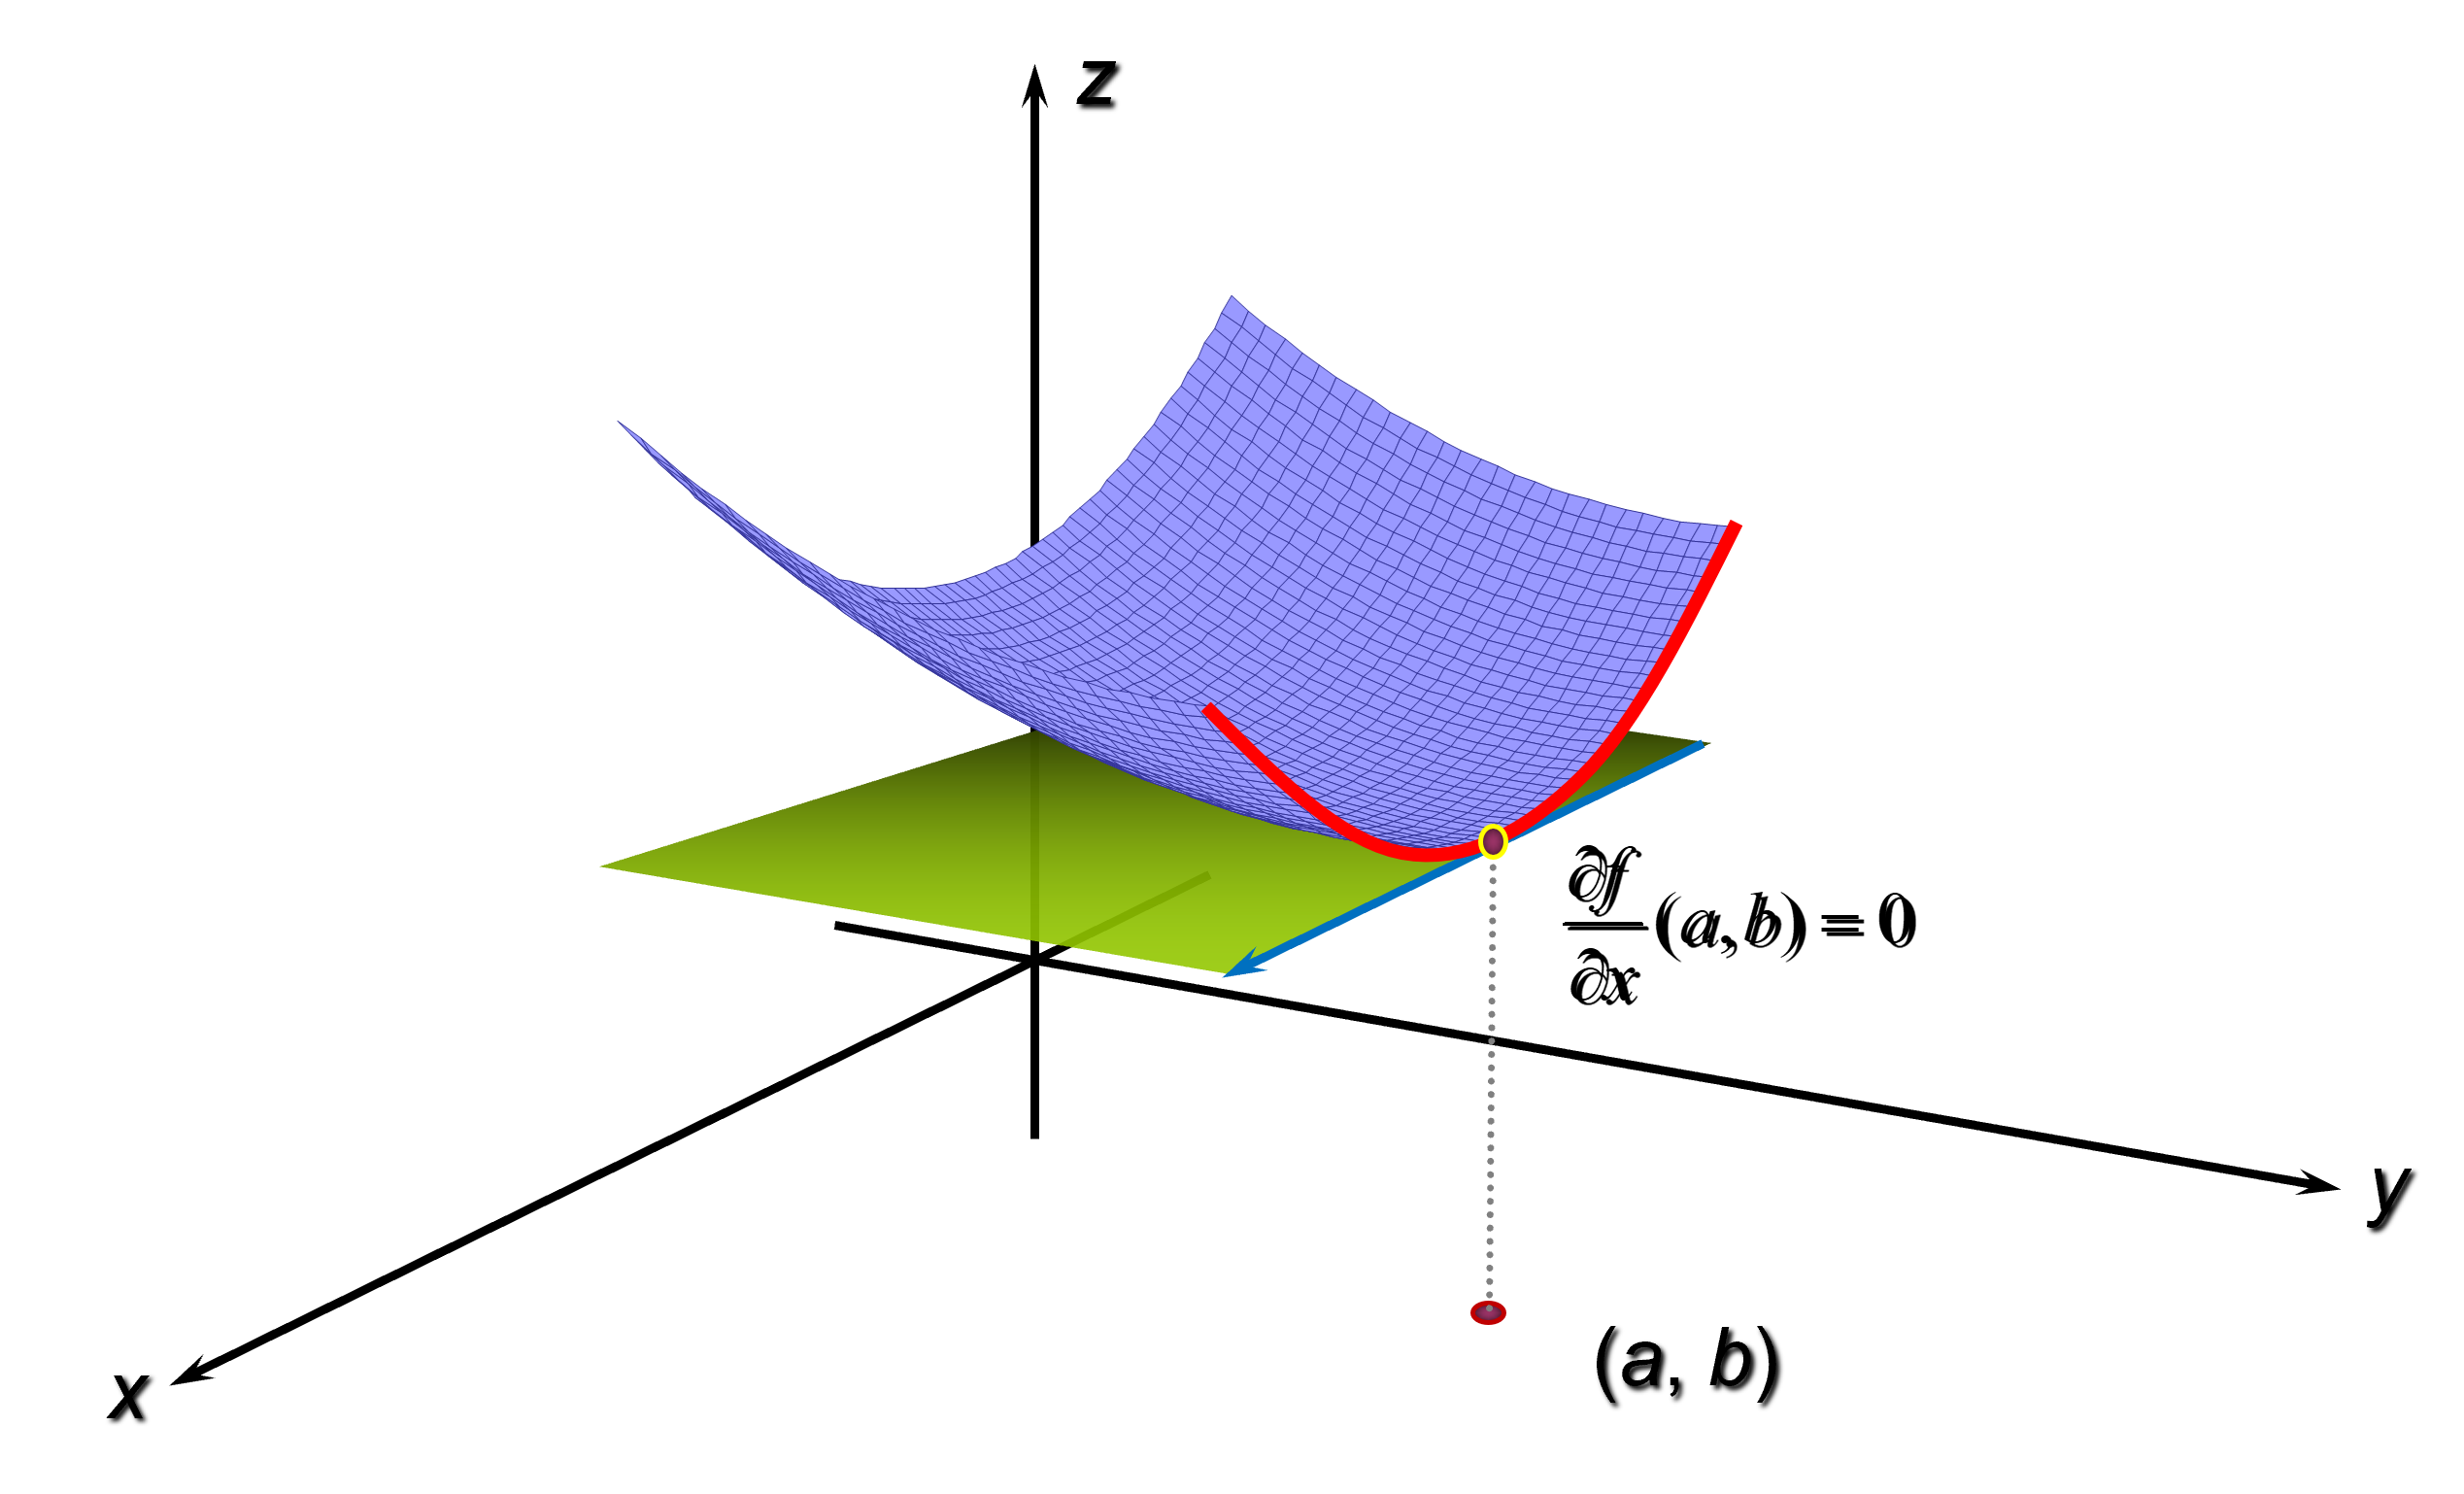 </div>

* Similarly, at a minimum point, the graph of the function has a slope of zero along a direction parallel to the y-axis



## How computers find the minima (or maxima): Gradient descent
* Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function.
* The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent. 
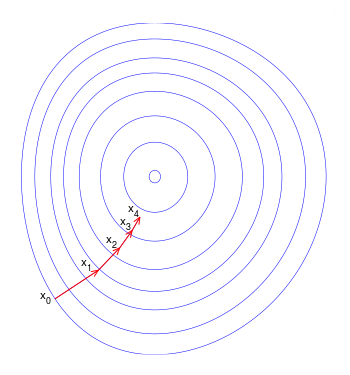 </div>

## Gradient descent
* Gradient descent is based on the observation that if the multi-variable function ${\displaystyle f(\mathbf {x} )}$ is defined and differentiable in a neighborhood of a point **a**, then ${\displaystyle f(\mathbf {x} )}$ decreases fastest if one goes from **a** in the direction of the negative gradient of **f** at **a**,$-\nabla f(a)$. It follows that, if $a_{n+1}=a_{n}-\gamma\nabla f(a_{n})$  
for a $\gamma\in\mathbb{R}_+$, small enough, then $f(a_{n})\geq f(a_{n+1})$. 
*one starts with a guess *x_o* for a local minimum of **_f_**, and considers the sequence {*x_o,x_1, x_2,x_3,....*} such that<br> $\boldsymbol{x}_{n+1}=\boldsymbol{x}_{n}-\gamma\nabla f(x_{n})$  We have a monotonic sequence<br>
$f(x_{o})\geq f(x_{1})\geq f(x_{2})\geq....,$<br>
so, hopefully, the sequence {$\boldsymbol{x}_{n}$} converges to the desired local minimum. 
* Note that the value of the step size $\gamma$  is allowed to change at every iteration. 

In [14]:
import torch
import math

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 316.2351989746094
199 213.899169921875
299 145.7027587890625
399 100.2352066040039
499 69.90583801269531
599 49.6639289855957
699 36.14689636230469
799 27.115291595458984
899 21.07691764831543
999 17.03721809387207
1099 14.332892417907715
1199 12.521198272705078
1299 11.306628227233887
1399 10.49174690246582
1499 9.944597244262695
1599 9.57691478729248
1699 9.329617500305176
1799 9.163150787353516
1899 9.05099105834961
1999 8.97535228729248
Result: y = 0.007808257360011339 + 0.8468385338783264 x + -0.0013470558915287256 x^2 + -0.091921865940094 x^3


## Gradient descent
* Step 1: Compute the Loss
For a regression problem, the loss is given by the Mean Square Error (MSE), that is, the average of all squared differences between labels (y) and predictions (a + bx).
* Step 2: Compute the Gradients
* Step 3: Update the Parameters
In the final step, we use the gradients to update the parameters. Since we are trying to minimize our losses, we reverse the sign of the gradient for the update. Note: There is still another parameter to consider: the learning rate $\gamma\$, 
* Step 4: Repeat